In [1]:
!pip install feature_selector
from feature_selector import FeatureSelector

In [80]:
pip install fa_kit

In [81]:
from fa_kit import FactorAnalysis
from fa_kit import plotting as fa_plotting

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
pip install factor_analyzer

     |████████████████████████████████| 40kB 1.7MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40382 sha256=e0f55f9cc84f9be56696b4b977d3f219b6e94408aa6b70397729a85f46800885
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [4]:
from sklearn.decomposition import PCA


In [125]:
def calc_broken_stick(dim):
    """Генерирует значения распределения правила сломаной трости для заданного числа компонент"""

    values = np.array([
        1.0 / (i + 1)
        for i in range(dim)
        ])
    values = np.sum(values) - np.insert(np.cumsum(values)[:-1], 0, 0)
    values /= dim

    return values


In [420]:
def draw_comp(values, rule, width = 15, height = 5):
  from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
  fig, ax = plt.subplots()
  fig.set_figwidth(width)
  fig.set_figheight(height)
  if (rule == 0):
    
    ax.plot(values, '-bo', )
    ax.plot([1 for i in range(len(values))], '--', color='green' )
    ax.set(xlabel='Число компонент', ylabel='Собственные значения',
          title='Правило Кайзера + метод каменистой осыпи')
    ax.yaxis.set_major_locator(MultipleLocator(1))
    
  if (rule == 1):
    t = values/len(values)
    ax.plot(t, '-bo' )
    ax.plot(calc_broken_stick(len(values)),color = 'red')
    ax.set(xlabel='Число компонент', ylabel='Нормированные собственные значения',
          title='Правило сломанной трости')
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
  #ax.xaxis.set_major_locator(MultipleLocator(1))
  dim=np.arange(1,len(values),1)
  plt.xticks(dim)
  ax.grid(which = 'major')
  plt.show()

In [5]:
df_train = pd.read_csv('training.csv')
df_Test = pd.read_csv('testing.csv')
df_train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,75.70,14.86,40.35,7.97,-32.92,-38.92,-14.94,4.47,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,30.58,20.42,39.83,-16.74,-24.92,-36.33,-15.67,8.16,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,63.20,26.70,49.28,3.25,-24.89,-30.38,-3.60,4.15,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,55.54,24.50,47.90,-6.20,-20.98,-30.28,-5.03,7.77,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,59.44,2.62,32.02,-1.33,-37.99,-43.57,-34.25,1.83,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [ ]:
plt.figure(figsize = (16,16))
corr =  df_train.corr()
sns.heatmap(corr, annot = True, cmap='viridis')

In [22]:
corr

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,pred_minus_obs_H_b2,pred_minus_obs_H_b3,pred_minus_obs_H_b4,pred_minus_obs_H_b5,pred_minus_obs_H_b6,pred_minus_obs_H_b7,pred_minus_obs_H_b8,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
b1,1.000000,0.062016,0.152092,0.684730,-0.119768,0.005094,0.411557,0.093572,0.261696,-0.956142,-0.067626,-0.166632,-0.632629,0.116932,-0.015551,-0.357187,-0.080004,-0.250659,0.062618,0.024077,0.050672,0.077164,0.011285,0.048943,0.062930,0.088128,0.075560
b2,0.062016,1.000000,0.981194,0.058709,0.786532,0.741036,0.276964,0.627359,0.588224,-0.068550,-0.992465,-0.959232,-0.069916,-0.790017,-0.756411,-0.286372,-0.617411,-0.582075,0.004815,0.008646,0.013120,0.020699,0.072193,0.046892,0.037899,0.054855,0.040602
b3,0.152092,0.981194,1.000000,0.106463,0.729293,0.708039,0.242349,0.626275,0.603003,-0.158565,-0.975372,-0.980498,-0.119587,-0.733503,-0.725897,-0.249823,-0.617028,-0.597867,0.003368,0.029047,0.019606,0.031285,0.076317,0.054507,0.045670,0.083515,0.068087
b4,0.684730,0.058709,0.106463,1.000000,-0.109407,0.167273,0.505824,0.101474,0.217717,-0.615245,-0.044667,-0.084549,-0.943567,0.112156,-0.166251,-0.469213,-0.097938,-0.212656,0.092265,0.039964,0.151523,0.035214,0.062079,0.126965,0.058156,0.020041,0.022551
b5,-0.119768,0.786532,0.729293,-0.109407,1.000000,0.926318,0.204106,0.704936,0.661180,0.153329,-0.750601,-0.661957,0.123148,-0.998321,-0.923820,-0.194216,-0.693762,-0.649419,-0.005420,0.041520,0.066429,0.000655,0.145961,0.100142,-0.025899,-0.007609,-0.024396
b6,0.005094,0.741036,0.708039,0.167273,0.926318,1.000000,0.252331,0.734751,0.727810,0.062037,-0.691022,-0.611314,-0.143428,-0.919764,-0.986478,-0.233501,-0.727472,-0.716055,-0.011642,0.048190,0.115445,-0.010771,0.157724,0.142020,-0.031771,-0.007283,-0.034001
b7,0.411557,0.276964,0.242349,0.505824,0.204106,0.252331,1.000000,0.019066,0.162467,-0.367251,-0.257164,-0.215765,-0.397133,-0.197184,-0.232560,-0.965267,0.006390,-0.132388,0.105641,-0.025480,0.028191,0.061042,0.110766,0.068016,0.049549,-0.058094,-0.067331
b8,0.093572,0.627359,0.626275,0.101474,0.704936,0.734751,0.019066,1.000000,0.950395,-0.084052,-0.610827,-0.587310,-0.112808,-0.701073,-0.731076,-0.025496,-0.991388,-0.945961,0.034931,0.023592,0.045550,0.051992,0.102290,0.074917,0.053131,0.043484,0.025847
b9,0.261696,0.588224,0.603003,0.217717,0.661180,0.727810,0.162467,0.950395,1.000000,-0.245010,-0.567551,-0.557491,-0.219000,-0.653656,-0.714095,-0.165842,-0.940071,-0.991239,0.067850,0.048660,0.086651,0.075618,0.134905,0.104341,0.072516,0.061557,0.037236
pred_minus_obs_H_b1,-0.956142,-0.068550,-0.158565,-0.615245,0.153329,0.062037,-0.367251,-0.084052,-0.245010,1.000000,0.091417,0.209192,0.619591,-0.146319,-0.032500,0.378215,0.073092,0.244609,-0.231149,-0.056861,-0.105800,-0.196535,-0.062025,-0.128122,-0.239353,-0.154976,-0.170767


In [49]:
fs = FeatureSelector(df_train.iloc[:, 1:])
fs.identify_collinear(correlation_threshold = 0.85)

No labels provided. Feature importance based methods are not available.
13 features with a correlation magnitude greater than 0.85.



In [35]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,b3,b2,0.981194
1,b6,b5,0.926318
2,b9,b8,0.950395
3,pred_minus_obs_H_b1,b1,-0.956142
4,pred_minus_obs_H_b2,b2,-0.992465
5,pred_minus_obs_H_b2,b3,-0.975372
6,pred_minus_obs_H_b3,b2,-0.959232
7,pred_minus_obs_H_b3,b3,-0.980498
8,pred_minus_obs_H_b3,pred_minus_obs_H_b2,0.974795
9,pred_minus_obs_H_b4,b4,-0.943567


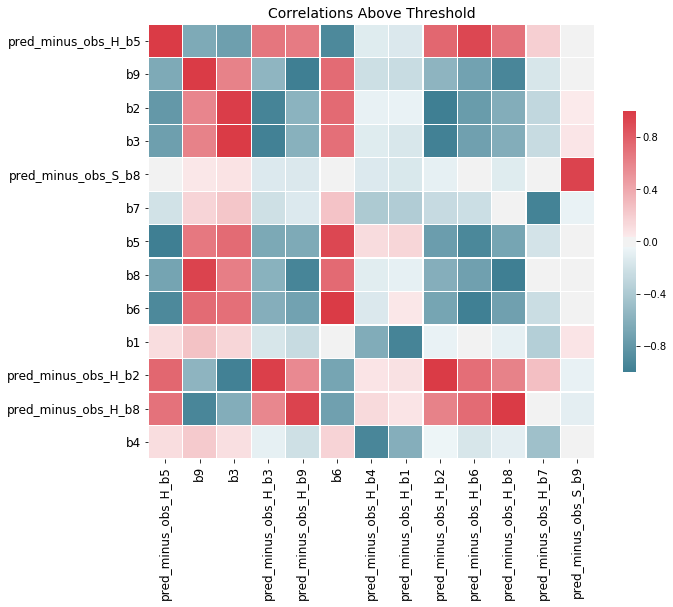

In [32]:
fs.plot_collinear()

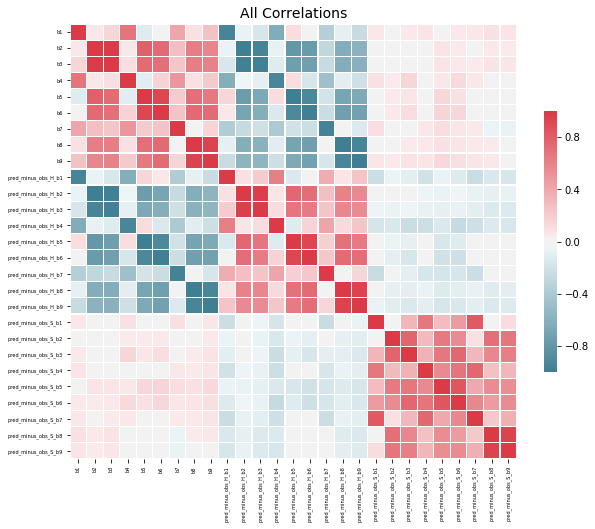

In [33]:
fs.plot_collinear(plot_all=True)

In [62]:
from sklearn.preprocessing import StandardScaler
X_train = df_train.iloc[:, 1:].values 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
pca = PCA(n_components=27)
X_tr = pca.fit_transform(X_train)
X_te = pca.transform(X_test)

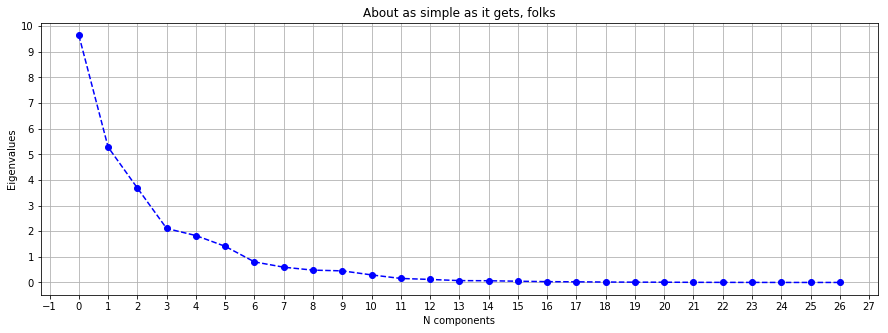

In [64]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)
ax.plot(pca.explained_variance_, '--bo', )

ax.set(xlabel='N components', ylabel='Eigenvalues',
       title='About as simple as it gets, folks')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(which = 'major')

#fig.savefig("test.png")
plt.show()

In [44]:
pca = PCA(n_components=3)
X_tr = pca.fit_transform(X_train)
X_te = pca.transform(X_test)

In [45]:
t =pd.DataFrame(X_tr)

In [46]:
t.corr()

,0,1,2
0,1.000000e+00,-1.712373e-16,6.807767e-17
1,-1.712373e-16,1.000000e+00,5.821062e-16
2,6.807767e-17,5.821062e-16,1.000000e+00


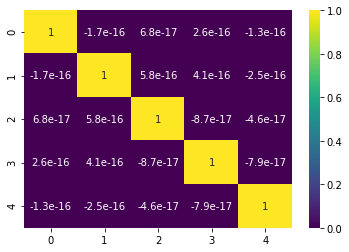

In [37]:
sns.heatmap(t.corr(), annot = True, cmap='viridis')

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8338461538461538


In [47]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_te)
print(accuracy_score(y_test, y_pred))

0.7384615384615385


In [51]:
df_tr = df_train.drop(columns=fs.ops['collinear'])
df_te = df_Test.drop(columns=fs.ops['collinear'])

In [65]:
X_train = df_tr.iloc[:, 1:].values # extracting inputs from training dataset - column 1 to till end
y_train = df_tr.iloc[:, 0].values
X_test = df_te.iloc[:, 1:].values # extracting inputs from testing dataset - column 1 to till end
y_test = df_te.iloc[:, 0].values

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
df_tr.shape

(198, 15)

In [114]:
pca = PCA(n_components=14)
X_tr = pca.fit_transform(X_train)
X_te = pca.transform(X_test)

In [68]:
pca.explained_variance_

array([4.58544546, 2.49304583, 2.07701588, 1.868477  , 0.76160451,
       0.5480239 , 0.46391913, 0.30268906, 0.27804975, 0.25004175,
       0.15414916, 0.12650643, 0.10674373, 0.05535439])

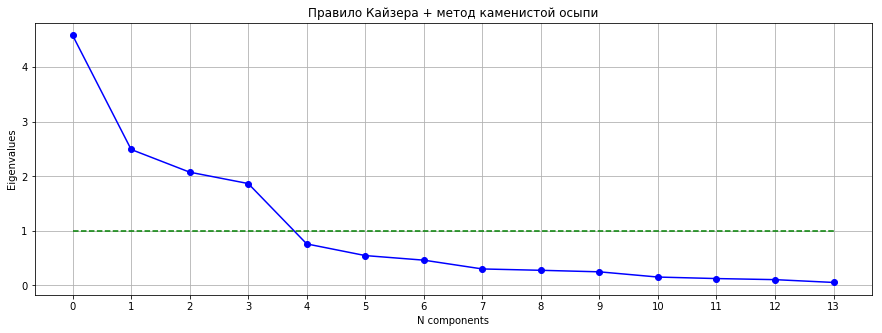

In [123]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)
ax.plot(pca.explained_variance_, '-bo', )
ax.plot([1 for i in range(14)], '--', color='green' )
ax.set(xlabel='N components', ylabel='Eigenvalues',
       title='Правило Кайзера + метод каменистой осыпи')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(which = 'major')

#fig.savefig("test.png")
plt.show()

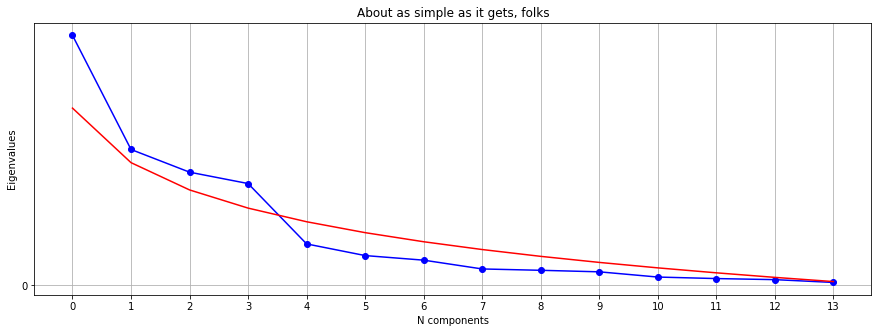

In [121]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)
t = pca.explained_variance_/14
ax.plot(t, '-bo' )

ax.plot(calc_broken_stick(14),color = 'red')
ax.set(xlabel='N components', ylabel='Eigenvalues',
       title='About as simple as it gets, folks')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(which = 'major')

#fig.savefig("test.png")
plt.show()

In [70]:
pca = PCA(n_components=5)
X_tr = pca.fit_transform(X_train)
X_te = pca.transform(X_test)

Оценка адекватности выборки для проведения факторного анализа

In [75]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_train.iloc[:,1:])
print(kmo_model)

0.5299580815938025


In [78]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_train.iloc[:,1:])
chi_square_value, p_value

(14032.495229447906, 0.0)

In [77]:
kmo_all,kmo_model=calculate_kmo(df_tr.iloc[:,1:])
print(kmo_model)

0.6619941735706738


In [79]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_tr.iloc[:,1:])
chi_square_value, p_value

(2091.3495835412596, 0.0)

In [132]:
pca = PCA(n_components=4)
X_tr = pca.fit_transform(X_train)
X_te = pca.transform(X_test)

Матрица факторных нагрузок

In [158]:
t= pca.components_.T * np.sqrt(pca.explained_variance_)
dfr = pd.DataFrame(t, index=df_tr.columns[1:])
dfr

,0,1,2,3
b1,0.136235,0.222087,-0.707849,0.419699
b2,0.127720,0.879365,0.157756,-0.095503
b4,0.174288,0.242820,-0.728995,0.441657
b5,0.132734,0.858121,0.346620,-0.164666
b7,0.133919,0.424237,-0.569496,0.232186
b8,0.151287,0.796352,0.191620,-0.121723
pred_minus_obs_S_b1,0.580252,-0.075645,-0.375131,-0.612151
pred_minus_obs_S_b2,0.687816,-0.109545,0.354766,0.490475
pred_minus_obs_S_b3,0.805668,-0.088006,0.175150,0.295887
pred_minus_obs_S_b4,0.757978,-0.107032,-0.184264,-0.411670


Можно вычислить вклады факторов в общую дисперсию всех признаков (путем
вычисления суммы квадратов факторных нагрузок для каждого фактора по всем признакам).
Чем выше доля этого вклада в общей дисперсии, тем более значимым является данный
фактор.

In [179]:
t = dfr**2
m = t.sum(axis=1)
m.sort_values(ascending=False)

b5                     0.901250
pred_minus_obs_S_b7    0.870159
pred_minus_obs_S_b1    0.857867
pred_minus_obs_S_b2    0.851516
pred_minus_obs_S_b6    0.846670
b2                     0.823602
b4                     0.815832
pred_minus_obs_S_b4    0.789412
pred_minus_obs_S_b5    0.779972
pred_minus_obs_S_b3    0.775073
b1                     0.745080
b8                     0.708599
pred_minus_obs_S_b8    0.682805
b7                     0.576147
dtype: float64

Анализ остатков

In [200]:
pca = PCA(n_components=4)
X_tr = pca.fit_transform(X_train)
X_te = pca.transform(X_test)

In [ ]:
w = np.dot(X_tr,pca.components_) 
err_mat = X_train-w
pd.DataFrame(err_mat)

In [209]:
kt = pd.DataFrame(err_mat)**2
np.sqrt(kt.sum(axis=0)/198)

0     0.508609
1     0.424921
2     0.433922
3     0.321405
4     0.653271
5     0.543120
6     0.382708
7     0.390877
8     0.478374
9     0.463223
10    0.473251
11    0.396997
12    0.366382
13    0.566254
dtype: float64

,b1,b2,b4,b5,b7,b8,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8
b1,1.000000,0.062016,0.684730,-0.119768,0.411557,0.093572,0.062618,0.024077,0.050672,0.077164,0.011285,0.048943,0.062930,0.088128
b2,0.062016,1.000000,0.058709,0.786532,0.276964,0.627359,0.004815,0.008646,0.013120,0.020699,0.072193,0.046892,0.037899,0.054855
b4,0.684730,0.058709,1.000000,-0.109407,0.505824,0.101474,0.092265,0.039964,0.151523,0.035214,0.062079,0.126965,0.058156,0.020041
b5,-0.119768,0.786532,-0.109407,1.000000,0.204106,0.704936,-0.005420,0.041520,0.066429,0.000655,0.145961,0.100142,-0.025899,-0.007609
b7,0.411557,0.276964,0.505824,0.204106,1.000000,0.019066,0.105641,-0.025480,0.028191,0.061042,0.110766,0.068016,0.049549,-0.058094
b8,0.093572,0.627359,0.101474,0.704936,0.019066,1.000000,0.034931,0.023592,0.045550,0.051992,0.102290,0.074917,0.053131,0.043484
pred_minus_obs_S_b1,0.062618,0.004815,0.092265,-0.005420,0.105641,0.034931,1.000000,0.024738,0.323592,0.670106,0.290621,0.471690,0.830451,-0.016495
pred_minus_obs_S_b2,0.024077,0.008646,0.039964,0.041520,-0.025480,0.023592,0.024738,1.000000,0.763327,0.299438,0.651027,0.555593,0.100607,0.707374
pred_minus_obs_S_b3,0.050672,0.013120,0.151523,0.066429,0.028191,0.045550,0.323592,0.763327,1.000000,0.347289,0.667901,0.751717,0.316680,0.580844
pred_minus_obs_S_b4,0.077164,0.020699,0.035214,0.000655,0.061042,0.051992,0.670106,0.299438,0.347289,1.000000,0.567965,0.682008,0.750615,0.266909


In [ ]:
 calc_X = pd.DataFrame(w)
 err_ = df_tr.iloc[:,1:].corr() - calc_X.corr()
 calc_X.index = df_tr.iloc[:,1:].index
 calc_X.columns = df_tr.iloc[:,1:].columns
 calc_X.corr()

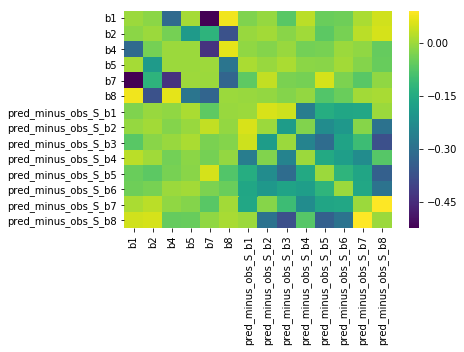

In [225]:
sns.heatmap(err_, cmap='viridis')

Датасет 2

In [228]:
df2 = pd.read_csv('sonar.csv', header=None)

In [229]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [235]:
names = ['F_'+str(i) for i in range(61)]
names[60]='Class'
df2.columns=names

In [236]:
df2.head()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [238]:
df2.describe()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.5

Проверка на пропущенные значения:

In [241]:
df2.isna().sum().sum()

0

Пропусков в данных нет

In [267]:
df2.corr()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,F_10,F_11,F_12,F_13,F_14,F_15,F_16,F_17,F_18,F_19,F_20,F_21,F_22,F_23,F_24,F_25,F_26,F_27,F_28,F_29,F_30,F_31,F_32,F_33,F_34,F_35,F_36,F_37,F_38,F_39,F_40,F_41,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,F_50,F_51,F_52,F_53,F_54,F_55,F_56,F_57,F_58,F_59
F_0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,0.344058,0.210861,0.210722,0.256278,0.304878,0.239079,0.137845,0.041817,0.055227,0.156760,0.117663,-0.056973,-0.163426,-0.218093,-0.295683,-0.342865,-0.341703,-0.224340,-0.199099,-0.077430,-0.048370,-0.030444,-0.031939,0.031319,0.098118,0.080722,0.119565,0.209873,0.208371,0.099993,0.127313,0.213592,0.206057,0.157949,0.279968,0.319354,0.230343,0.203234,0.247560,0.269287,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
F_1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,0.297065,0.194102,0.249596,0.273170,0.307599,0.261844,0.152170,0.042870,0.040911,0.102428,0.075255,-0.074157,-0.179365,-0.196469,-0.295302,-0.365749,-0.337046,-0.234386,-0.228490,-0.115301,-0.055862,-0.049683,-0.108272,-0.004247,0.115824,0.132611,0.169186,0.217494,0.186828,0.098350,0.188226,0.261345,0.186368,0.133018,0.285716,0.304247,0.255797,0.265279,0.313995,0.245868,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
F_2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,0.274610,0.214807,0.258767,0.291724,0.285663,0.237017,0.201093,0.120587,0.099303,0.103117,0.063990,-0.026815,-0.073400,-0.085380,-0.214256,-0.291974,-0.263111,-0.256674,-0.290728,-0.197493,-0.106198,-0.109895,-0.170671,-0.099409,0.017053,0.053070,0.107530,0.130276,0.110499,0.074137,0.189047,0.233442,0.113920,0.071946,0.180734,0.173649,0.179528,0.234896,0.223074,0.081096,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
F_3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,0.271881,0.175381,0.215754,0.286708,0.278529,0.248245,0.223203,0.194992,0.189405,0.188317,0.142271,0.036010,-0.029749,-0.102975,-0.206673,-0.291357,-0.294749,-0.256074,-0.300476,-0.236602,-0.190086,-0.169987,-0.164651,-0.083965,0.015200,0.039282,0.063486,0.089887,0.089346,0.045141,0.145241,0.144693,0.050629,-0.008407,0.087824,0.080012,0.046109,0.121065,0.133294,0.077925,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
F_4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,0.231684,0.211657,0.299086,0.359062,0.318059,0.328725,0.326477,0.299266,0.340543,0.285737,0.205088,0.152897,0.073934,-0.000624,-0.067296,-0.125675,-0.169618,-0.214692,-0.283863,-0.273350,-0.214336,-0.173485,-0.200586,-0.140559,-0.086529,-0.073481,-0.064617,-0.008620,0.063408,0.061616,0.098832,0.125181,0.063706,0.031575,0.089202,0.081964,0.041419,0.084435,0.088128,0.066751,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
F_5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,0.333570,0.344451,0.411107,0.396233,0.367908,0.353783,0.293190,0.235778,0.226305,0.206841,0.174768,0.123770,0.064081,0.027026,-0.043280,-0.100309,-0.129094,-0.118645,-0.156081,-0.151186,-0.054136,-0.051934,-0.144391,-0.070337,-0.028815,-0.023621,-0.064798,-0.048745,0.030599,0.081119,0.075797,0.048763,0.034380,0.048870,0.085468,0.029524,0.016640,0.067196,0.080729,0.017300,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
F_6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,0.396588,0.274432,0.365391,0.409576,0.411692,0.363086,0.250024,0.208057,0.215495,0.196496,0.165827,0.063773,0.009359,0.011982,-0.057147,-0.126074,-0.179526,-0.116848,-0.129694,-0.068142,-0.096945,-0.115871,-0.127052,-0.077662,-0.015531,0.002979,-0.001376,0.065900,0.08094

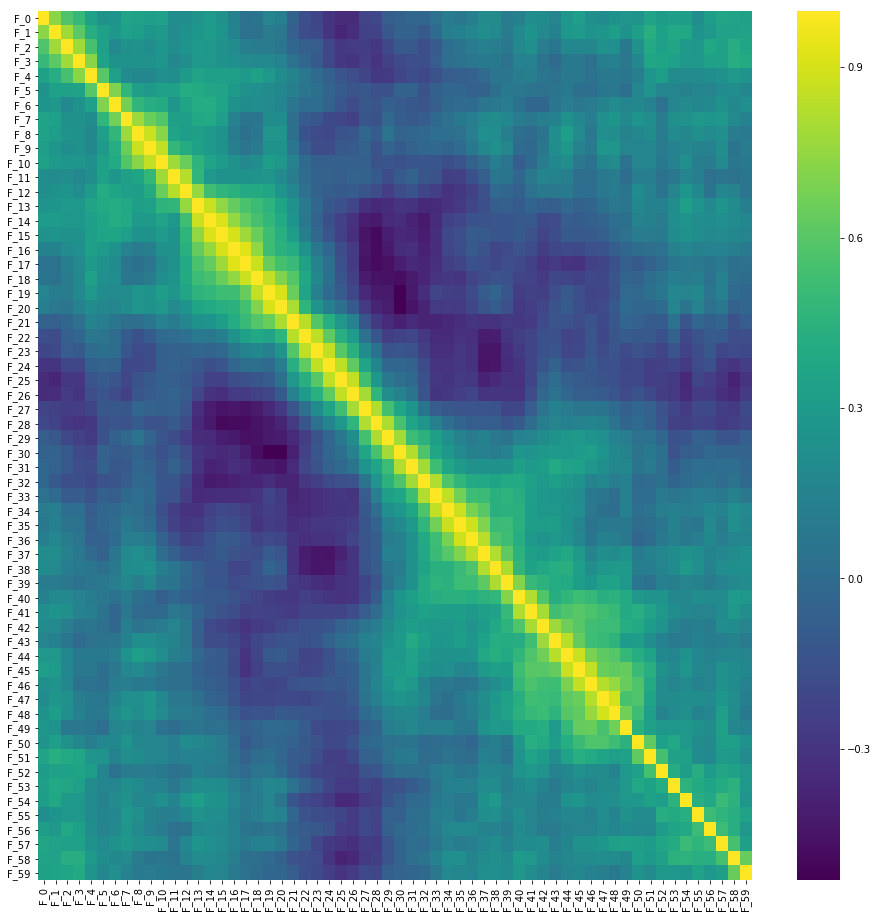

In [269]:
plt.figure(figsize = (16,16))
sns.heatmap(df2.corr(), cmap='viridis')

In [246]:
X_train = df2.iloc[:, :-1].values # extracting inputs from training dataset - column 1 to till end


In [249]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [250]:
pca = PCA(n_components=X_train.shape[1])
X_tr = pca.fit_transform(X_train)

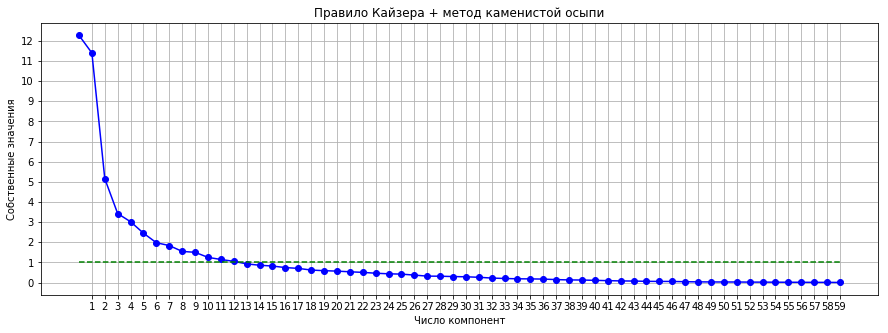

In [263]:
draw_comp(pca.explained_variance_, 0)

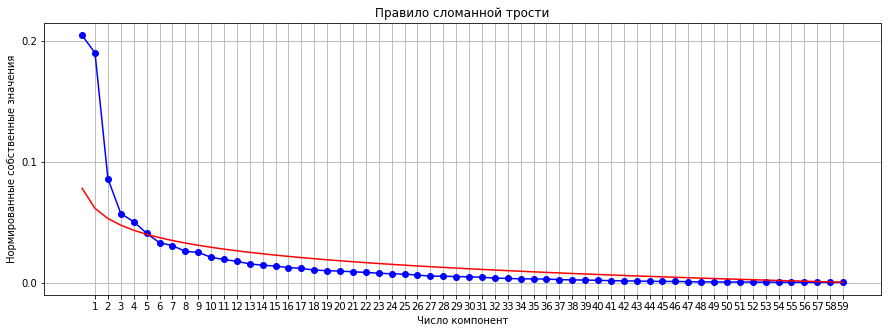

In [266]:
draw_comp(pca.explained_variance_, 1)

По правилу Кайзера - 12 компонент

По правилу каменистой осыпи - 3 компоненты

По правилу сломаной трости - 6 компонент

In [270]:
pca = PCA(n_components=12)
X_tr = pca.fit_transform(X_train)

In [271]:
y_train = df2['Class']

In [272]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.9182692307692307


In [273]:
classifier = LogisticRegression()
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_tr)
print(accuracy_score(y_train, y_pred))

0.8173076923076923


In [274]:
pca = PCA(n_components=3)
X_tr = pca.fit_transform(X_train)

In [275]:
classifier = LogisticRegression()
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_tr)
print(accuracy_score(y_train, y_pred))

0.7596153846153846


In [277]:
pca = PCA(n_components=6)
X_tr = pca.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_tr)
print(accuracy_score(y_train, y_pred))

0.7740384615384616


In [278]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df2.iloc[:,:-1])
print(kmo_model)

0.7523322448128427


/usr/local/lib/python3.6/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [279]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df2.iloc[:,:-1])
chi_square_value, p_value

(15801.472783241321, 0.0)

In [280]:
fs = FeatureSelector(df2.iloc[:,:-1])
fs.identify_collinear(correlation_threshold = 0.85)
fs.record_collinear

No labels provided. Feature importance based methods are not available.
18 features with a correlation magnitude greater than 0.85.



,drop_feature,corr_feature,corr_value
0,F_9,F_8,0.877131
1,F_10,F_9,0.853140
2,F_14,F_13,0.869733
3,F_15,F_14,0.912625
4,F_16,F_15,0.899234
5,F_17,F_16,0.925836
6,F_18,F_17,0.875028
7,F_19,F_18,0.854572
8,F_20,F_19,0.905062
9,F_23,F_22,0.850294


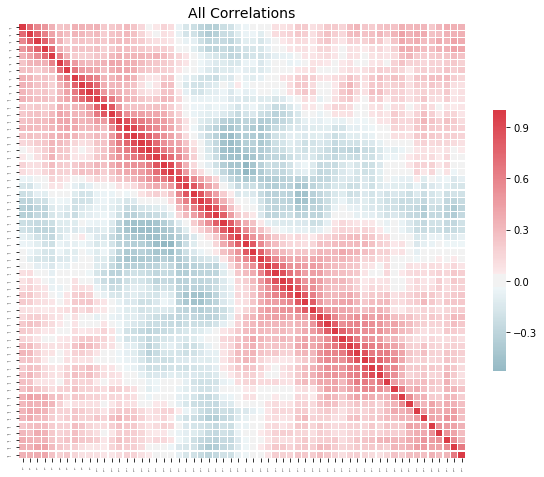

In [281]:
fs.plot_collinear(plot_all=True)

In [282]:
df2_new = df2.drop(columns=fs.ops['collinear'])

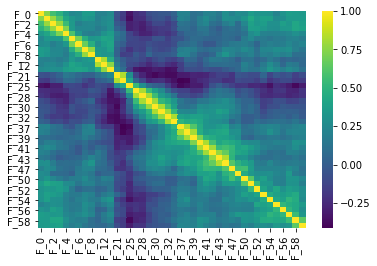

In [283]:
sns.heatmap(df2_new.corr(), cmap='viridis')

In [284]:
X_train = df2_new.iloc[:, :-1].values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [285]:
pca = PCA(n_components=X_train.shape[1])
X_tr = pca.fit_transform(X_train)

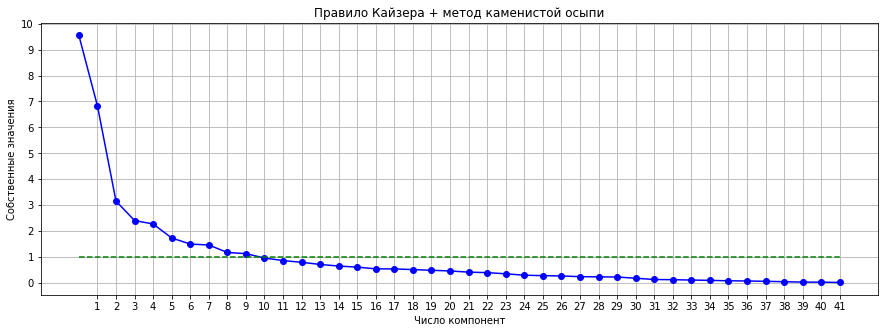

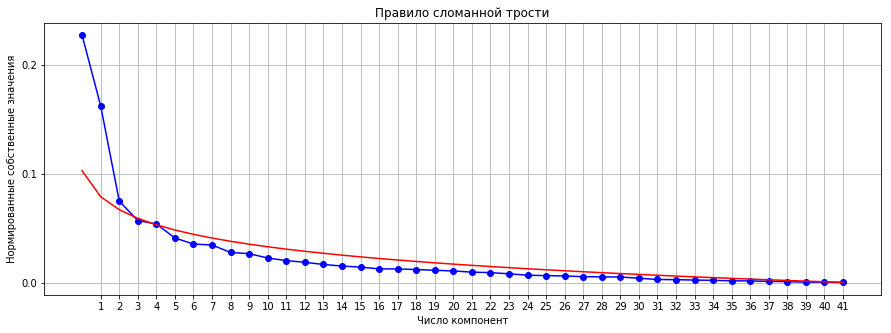

In [286]:
draw_comp(pca.explained_variance_, 0)
draw_comp(pca.explained_variance_, 1)

По правилу Кайзера - 9 компонент
По правилу каменистой осыпи - 3 компоненты
По правилу сломаной трости - 5 компонент

In [287]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_train)
print(accuracy_score(y_train, y_pred))

0.875


In [308]:
pca = PCA(n_components=9)
X_tr = pca.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_tr)
print(accuracy_score(y_train, y_pred))

0.7548076923076923


In [293]:
pca = PCA(n_components=3)
X_tr = pca.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_tr)
print(accuracy_score(y_train, y_pred))

0.7259615384615384


In [292]:
pca = PCA(n_components=6)
X_tr = pca.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_tr, y_train)
y_pred = classifier.predict(X_tr)
print(accuracy_score(y_train, y_pred))

0.7163461538461539


In [294]:
kmo_all,kmo_model=calculate_kmo(df2_new.iloc[:,:-1])
print(kmo_model)

0.7346720683651647


/usr/local/lib/python3.6/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [295]:
chi_square_value,p_value=calculate_bartlett_sphericity(df2_new.iloc[:,:-1])
chi_square_value, p_value

(7500.9510562840005, 0.0)

Матрица факторных нагрузок

In [309]:
t= pca.components_.T * np.sqrt(pca.explained_variance_)
dfr = pd.DataFrame(t, index=df2_new.columns[:-1])
dfr

,0,1,2,3,4,5,6,7,8
F_0,0.613323,0.220906,-0.030290,0.077258,0.210616,0.196610,-0.159136,0.145747,-0.068823
F_1,0.666683,0.271896,-0.032062,0.153684,0.217240,0.300505,-0.198090,0.125110,-0.017831
F_2,0.610253,0.370902,0.025804,0.228426,0.196301,0.423341,-0.061475,0.041839,-0.134821
F_3,0.556829,0.432533,0.074538,0.204149,0.215185,0.434324,0.067800,0.072701,-0.087497
F_4,0.440880,0.452584,-0.080991,0.069485,0.056324,0.479325,0.230362,0.009358,0.014199
F_5,0.392217,0.385036,-0.339053,-0.248673,0.161265,0.240803,0.328026,-0.013361,0.269774
F_6,0.389205,0.337137,-0.344606,-0.405148,0.187227,-0.065443,0.221434,0.208878,0.279870
F_7,0.496865,0.251597,-0.338678,-0.442375,0.166588,-0.202251,0.038953,0.326158,0.135932
F_8,0.438571,0.179353,-0.368165,-0.430388,0.211958,-0.156329,-0.050640,0.327926,-0.040529
F_11,0.277534,0.307239,-0.437202,-0.380757,-0.082983,0.063105,-0.140049,-0.470175,-0.203810


In [310]:
t = dfr**2
m = t.sum(axis=1)
m.sort_values(ascending=False)

F_12    0.931346
F_28    0.819748
F_7     0.815606
F_30    0.815062
F_22    0.809962
F_32    0.805080
F_29    0.804822
F_2     0.804280
F_42    0.802898
F_11    0.800629
F_27    0.797010
F_3     0.796857
F_41    0.791081
F_38    0.790576
F_39    0.789020
F_44    0.787733
F_31    0.783920
F_43    0.779514
F_6     0.758367
F_21    0.757744
F_37    0.755346
F_40    0.749299
F_5     0.743432
F_1     0.735747
F_13    0.731886
F_8     0.726398
F_33    0.725539
F_50    0.713247
F_4     0.696876
F_25    0.692762
F_51    0.654996
F_47    0.649572
F_55    0.621493
F_58    0.618684
F_57    0.607784
F_49    0.582939
F_54    0.567402
F_0     0.566169
F_56    0.559287
F_53    0.483894
F_52    0.453241
F_59    0.428706
dtype: float64

In [ ]:
w = np.dot(X_tr,pca.components_) 
err_mat = X_train-w
pd.DataFrame(err_mat)

In [ ]:
kt = pd.DataFrame(err_mat)**2
np.sqrt(kt.sum(axis=0)/198)

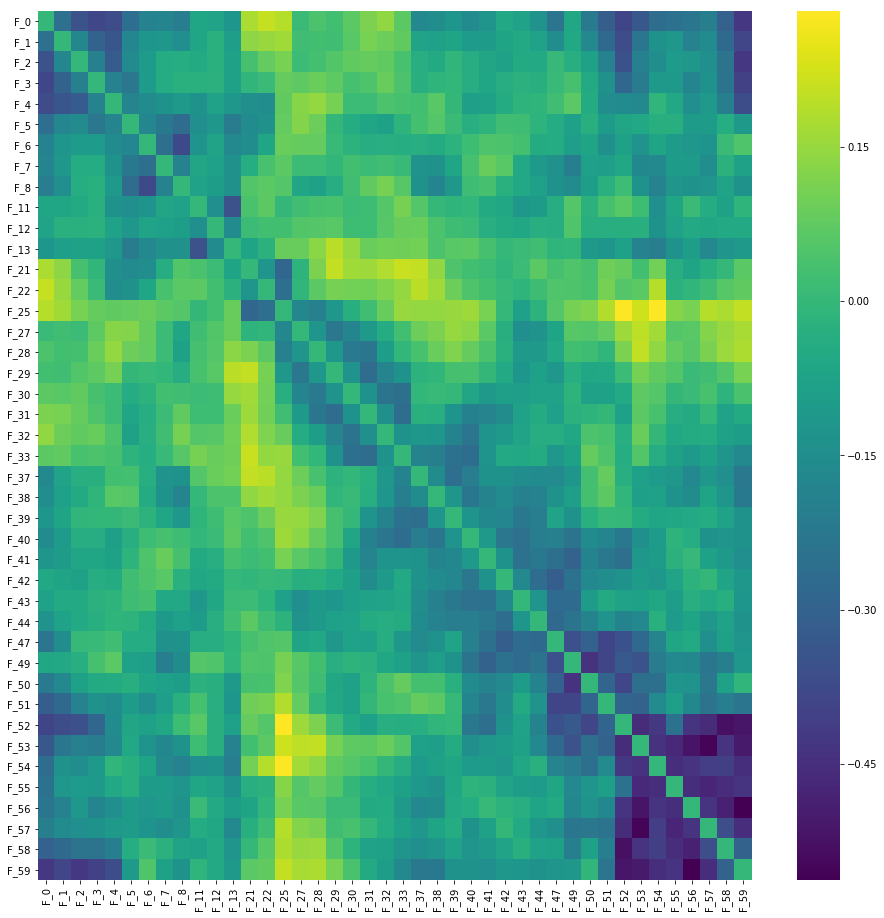

In [313]:
calc_X = pd.DataFrame(w)
calc_X.index = df2_new.iloc[:,:-1].index
calc_X.columns = df2_new.iloc[:,:-1].columns
err_ = df2_new.iloc[:,:-1].corr() - calc_X.corr()
plt.figure(figsize = (16,16))
sns.heatmap(err_, cmap='viridis')

Датасет 3

In [323]:
from sklearn.datasets import fetch_lfw_people
import scipy

In [328]:
!pip install -U -q kaggle 
!mkdir -p ~/.kaggle

In [329]:
!cp kaggle.json ~/.kaggle/

In [330]:
!kaggle datasets download -d chetankv/dogs-cats-images

 96% 417M/435M [00:16<00:00, 23.2MB/s]
100% 435M/435M [00:16<00:00, 27.2MB/s]


In [331]:
!unzip -qq dogs-cats-images.zip

In [377]:
import os
from PIL import Image
import cv2
import random
train_cats=os.listdir('/content/dog vs cat/dataset/training_set/cats')
train_dogs=os.listdir('/content/dog vs cat/dataset/training_set/dogs')
def show_sample_images(k):
    plt.figure()
    cat_imgs=random.choices(train_cats,k=k)
    dog_imgs=random.choices(train_dogs,k=k)
    fig,ax=plt.subplots(2,k,figsize=(15,10))
    train_dir = '/content/dog vs cat/dataset/training_set'
    for i in range(k):
        img_cat= Image.open(train_dir+'/cats/'+cat_imgs[i]).convert('LA')
        img_dog=Image.open(train_dir+'/dogs/'+dog_imgs[i]).convert('LA')
        img_cat = cv2.imread(train_dir+'/cats/'+cat_imgs[i])
        img_dog = cv2.imread(train_dir+'/dogs/'+dog_imgs[i])
        img_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2GRAY)
        img_dog = cv2.cvtColor(img_dog, cv2.COLOR_BGR2GRAY)
        ax[0,i].imshow(img_cat, cmap='Greys_r')
        ax[1,i].imshow(img_dog, cmap='Greys_r')
    plt.show()

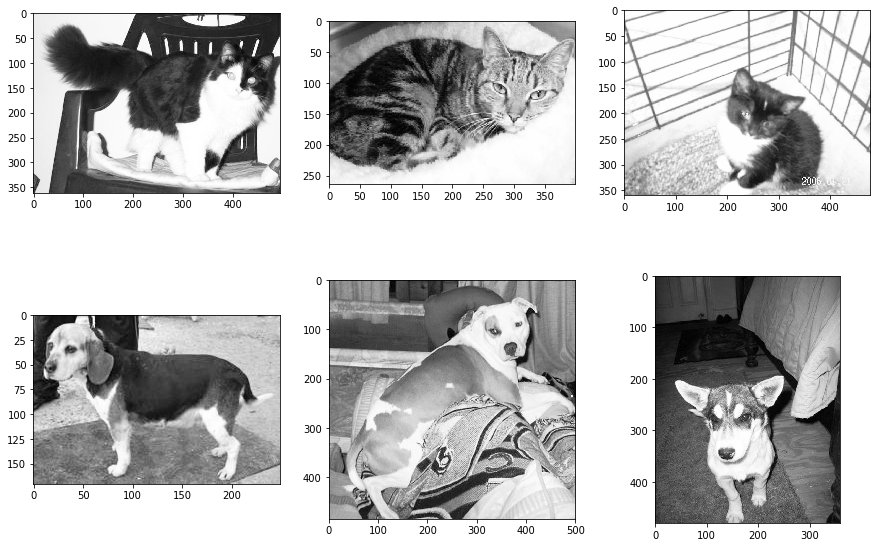

In [378]:
show_sample_images(3)

In [402]:
img_cat =  cv2.imread('/content/dog vs cat/dataset/training_set/cats/cat.10.jpg')
img_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2GRAY)
img_cat = cv2.resize(img_cat,(50,50))

In [393]:
img_cat.flatten()

array([42, 42, 43, ..., 41, 34, 32], dtype=uint8)

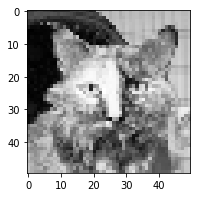

In [403]:
plt.figure(figsize = (3,3))
plt.imshow(img_cat, cmap = 'Greys_r')

In [471]:
def create_dataset():
    res = []
    train_dir = '/content/dog vs cat/dataset/training_set'
    for i in range(len(train_cats)):

        img_cat = cv2.imread(train_dir+'/cats/'+train_cats[i])
        img_dog = cv2.imread(train_dir+'/dogs/'+train_dogs[i])
        img_cat = cv2.cvtColor(img_cat, cv2.COLOR_BGR2GRAY)
        img_dog = cv2.cvtColor(img_dog, cv2.COLOR_BGR2GRAY)
        img_cat = cv2.resize(img_cat,(60,60))
        img_dog = cv2.resize(img_dog,(60,60))
        res.append(img_cat.flatten())
        res.append(img_dog.flatten())
    res_arr = np.array(res)
    return pd.DataFrame(res_arr)

In [472]:
df3 = create_dataset()

In [473]:
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3560,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575,3576,3577,3578,3579,3580,3581,3582,3583,3584,3585,3586,3587,3588,3589,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
0,101,104,107,109,106,106,106,106,103,107,102,106,106,105,108,106,107,106,98,90,103,110,112,110,179,212,218,222,226,229,252,253,254,255,254,254,254,255,255,255,...,86,78,85,85,80,86,90,92,91,90,86,85,85,90,90,93,103,102,106,92,91,88,92,95,94,91,94,91,87,87,100,102,104,95,91,85,86,86,95,110
1,95,102,109,115,127,148,179,189,188,188,159,159,184,196,189,177,181,142,138,122,170,165,185,186,193,192,185,201,192,194,191,195,189,190,206,200,245,195,195,173,...,153,131,183,227,226,155,48,38,48,98,234,220,244,207,160,183,222,224,124,216,208,107,177,239,246,237,233,207,207,41,48,34,71,232,211,229,228,183,158,249
2,199,176,136,199,199,198,197,197,198,198,186,121,200,201,201,200,200,200,198,184,119,203,203,204,202,201,200,200,198,123,201,203,202,203,200,200,202,194,120,204,...,188,189,190,191,194,189,192,190,189,190,190,189,186,186,186,177,184,184,192,184,189,191,186,192,192,189,190,193,192,190,189,180,183,179,182,179,177,177,179,179
3,1,5,6,7,9,4,9,11,16,12,5,5,1,2,2,2,5,10,6,7,12,71,101,93,79,101,103,105,90,102,113,118,98,102,122,129,126,119,109,113,...,108,97,71,81,61,75,64,76,84,80,79,76,77,77,68,71,70,69,67,65,69,69,71,70,73,72,87,115,140,142,148,168,166,129,68,66,53,56,50,46
4,181,185,190,193,183,102,183,191,190,192,189,195,190,46,193,192,196,198,201,201,209,207,202,201,188,140,89,67,43,61,40,58,55,83,108,115,109,113,105,88,...,72,83,68,68,66,64,64,57,63,60,50,61,66,71,69,68,68,70,67,64,60,59,58,63,60,59,58,60,57,58,57,62,117,79,119,199,241,246,240,246


In [474]:
df3.shape

(8000, 3600)

In [475]:
cor_m = df3.corr()

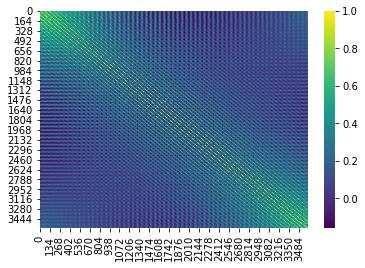

In [476]:
sns.heatmap(cor_m, cmap='viridis')

In [477]:
kmo_all,kmo_model=calculate_kmo(df3)
print(kmo_model)

/usr/local/lib/python3.6/dist-packages/numpy/linalg/linalg.py:1874: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


0.9940661510600819


In [478]:
chi_square_value,p_value=calculate_bartlett_sphericity(df2_new.iloc[:,:-1])
chi_square_value, p_value

(7500.9510562840005, 0.0)

In [479]:
X_train = df3.values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
pca = PCA(n_components=X_train.shape[1])
X_tr = pca.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


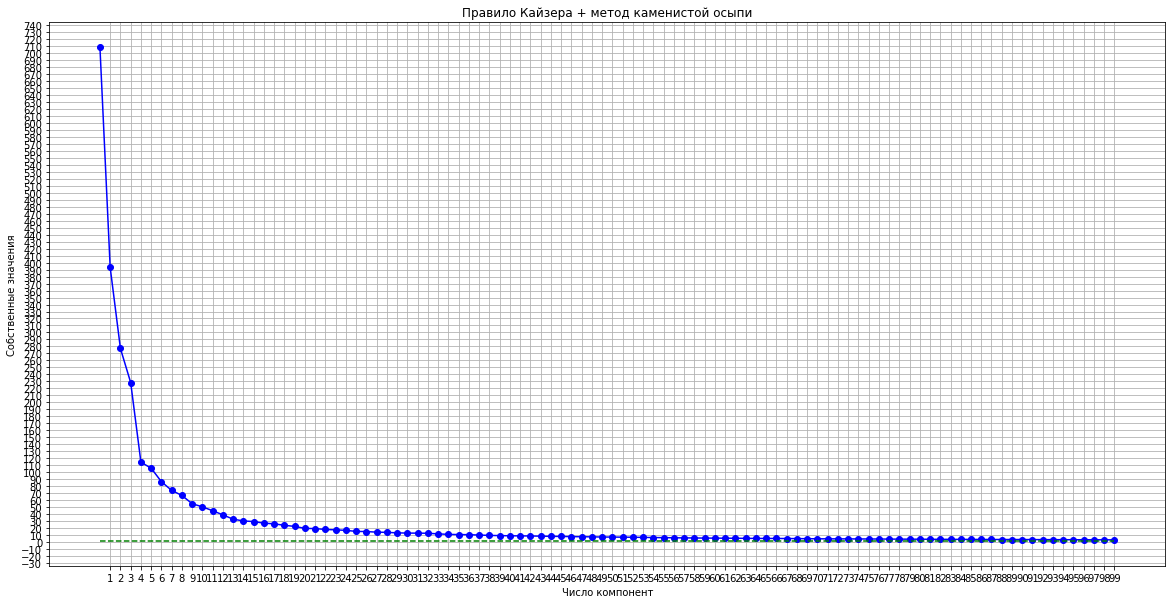

In [480]:
  rule = 0
  from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
  fig, ax = plt.subplots()
  fig.set_figwidth(20)
  fig.set_figheight(10)
  if (rule == 0):
    values = pca.explained_variance_
    ax.plot(values[:100], '-bo', )
    ax.plot([1 for i in range(100)], '--', color='green' )
    ax.set(xlabel='Число компонент', ylabel='Собственные значения',
          title='Правило Кайзера + метод каменистой осыпи')
    ax.yaxis.set_major_locator(MultipleLocator(10))

  dim=np.arange(1,100,1)
  plt.xticks(dim)
  ax.grid(which = 'major')
  plt.show()

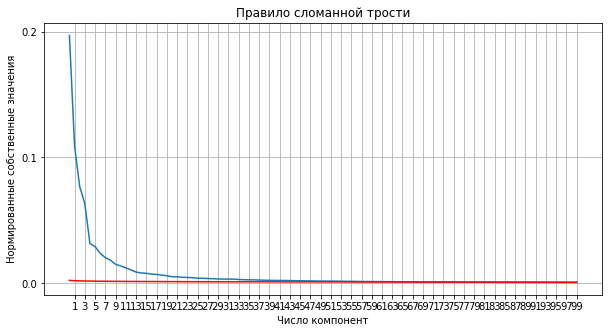

In [481]:
  rule = 1
  from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
  fig, ax = plt.subplots()
  fig.set_figwidth(10)
  fig.set_figheight(5)

  if (rule == 1):
    t = values/len(values)
    ax.plot(t[:100], '-' )
    ax.plot(calc_broken_stick(len(values))[:100],color = 'red')
    r = calc_broken_stick(len(values))
    for i in range(len(t)):
      if t[i] < r[i]:
        print(i+1)
      break
    g = t-r
    g[g < 0]
 
    ax.set(xlabel='Число компонент', ylabel='Нормированные собственные значения',
          title='Правило сломанной трости')
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
  #ax.xaxis.set_major_locator(MultipleLocator(1))
  dim=np.arange(1,100,2)
  plt.xticks(dim)
  ax.grid(which = 'major')
  plt.show()
  

In [482]:
t = pca.explained_variance_[pca.explained_variance_ > 1]
len(t)

219

In [483]:
values = pca.explained_variance_
e = calc_broken_stick(len(values))
t = values/len(values)

In [484]:
a = np.where(e - t > 0)
a[0][0]

78

По правилу Кайзера - 87 компонент
По правилу каменистой осыпи - 4 компоненты
По правилу сломаной трости - 33 компонент

In [487]:
X_train = df3.values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
pca = PCA(n_components=219)
X_tr = pca.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


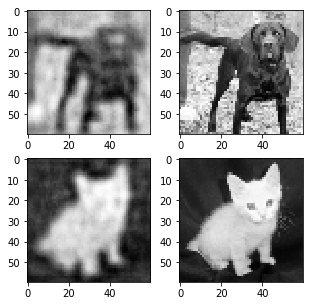

In [495]:
k = 1
b = 126
w = np.dot(X_tr,pca.components_) 
fig,ax=plt.subplots(2,2,figsize=(5,5))
temp = np.reshape(w[k], (60,60)) 
ax[0,0].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(X_train[k], (60,60))
ax[0,1].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(w[b], (60,60)) 
ax[1,0].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(X_train[b], (60,60))
ax[1,1].imshow(temp, cmap = 'Greys_r')

In [496]:
t= pca.components_.T * np.sqrt(pca.explained_variance_)
dfr = pd.DataFrame(t)
dfr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
0,0.535763,0.412027,-0.076514,-0.157078,0.100747,-0.179401,-0.196318,-0.150442,0.179195,0.003149,0.035184,-0.046733,0.139069,0.044908,-0.055994,-0.185599,-0.005769,-0.074726,-0.083434,0.081866,0.081831,-0.019325,0.039546,0.007943,-0.003463,0.037882,0.111381,0.077248,0.027517,-0.033221,0.063000,-0.051867,0.041534,-0.023547,0.066240,0.067619,0.031968,0.029523,-0.008303,0.009216,...,-0.033409,0.008208,-0.018224,-0.014031,-0.019295,0.007043,0.038425,0.018111,0.041106,-0.000141,-0.017143,0.005880,-0.029235,-0.006879,0.019958,-0.004865,0.005998,-0.034413,0.015529,0.011988,0.014901,0.002078,0.017253,0.024190,-0.005612,-0.011744,0.000640,0.033148,-0.031779,-0.015127,-0.024545,0.007263,0.003013,-0.018790,0.016663,-0.020019,0.008946,0.030280,-0.014174,0.002736
1,0.546372,0.413020,-0.087588,-0.158730,0.104146,-0.186746,-0.195969,-0.152691,0.172327,0.002072,0.032281,-0.050584,0.141752,0.038838,-0.057521,-0.186726,0.005237,-0.071213,-0.081088,0.085275,0.092175,-0.020785,0.045043,-0.003250,-0.010378,0.045352,0.111379,0.074855,0.023169,-0.016775,0.070446,-0.057071,0.042692,-0.023780,0.064252,0.066382,0.024804,0.027976,-0.011214,0.020329,...,-0.030933,0.003476,-0.026734,-0.005480,-0.011162,-0.000602,0.028172,0.020206,0.031570,0.012584,-0.025823,0.014787,-0.027864,-0.009563,0.014938,-0.016373,0.007830,-0.037763,0.020079,0.011039,0.027216,0.001604,0.017783,0.009341,-0.006379,0.000056,0.007324,0.026894,-0.030494,-0.007446,-0.012938,0.009490,-0.006098,-0.019030,0.019208,-0.026514,0.005884,0.029403,-0.007433,-0.004515
2,0.550537,0.418752,-0.092166,-0.163457,0.109962,-0.190887,-0.194674,-0.146420,0.164583,-0.004960,0.036214,-0.057143,0.139521,0.036563,-0.060711,-0.183150,0.010017,-0.060452,-0.080851,0.088690,0.098249,-0.027332,0.041621,-0.002741,-0.016462,0.044340,0.111557,0.070069,0.015251,-0.005654,0.061459,-0.051677,0.047368,-0.022324,0.065465,0.068346,0.023723,0.029806,-0.010337,0.021321,...,-0.029984,-0.002458,-0.022021,-0.003995,-0.003475,-0.011820,0.015176,0.020704,0.007847,0.018058,-0.020688,0.009608,-0.024485,0.003051,0.009093,-0.021688,0.000655,-0.032285,0.025460,0.003122,0.032294,0.000208,0.021027,-0.004189,-0.008177,0.003357,0.004195,0.034007,-0.024065,-0.001518,-0.004555,0.013731,-0.007269,-0.014306,0.022206,-0.028420,0.001319,0.032083,-0.000794,-0.002979
3,0.551003,0.423021,-0.099560,-0.162556,0.115570,-0.188342,-0.201377,-0.146582,0.163961,-0.000312,0.044732,-0.071390,0.139151,0.035148,-0.063282,-0.173468,0.023748,-0.066482,-0.080133,0.091798,0.098931,-0.022553,0.038985,-0.002868,-0.013466,0.050856,0.113243,0.073830,0.010395,0.003259,0.062615,-0.053665,0.050053,-0.022312,0.061707,0.071948,0.019916,0.037096,-0.008817,0.029687,...,-0.016108,-0.017247,-0.021787,-0.010234,0.001070,-0.008814,0.016594,0.015591,-0.002922,0.021214,-0.003586,0.011697,-0.020846,-0.015419,0.003942,-0.018124,-0.014938,-0.027999,0.023962,-0.011167,0.031259,-0.003958,0.011191,-0.008310,-0.013732,0.004219,0.001550,0.027521,-0.006661,-0.007910,0.005816,0.020877,-0.016069,-0.011461,0.019856,-0.024668,0.006718,0.032155,0.007265,-0.005111
4,0.552945,0.422889,-0.105759,-0.158119,0.127468,-0.195438,-0.202897,-0.145862,0.156889,-0.006426,0.047077,-0.079665,0.139303,0.024804,-0.071438,-0.168958,0.030725,-0.056712,-0.075003,0.096853,0.102309,-0.022028,0.031973,-0.000196,-0.006433,0.052963,0.104055,0.067611,0.004862,0.011651,0.056219,-0.048689,0.055834,-0.020525,0.064413,0.066445,0.015858,0.052718,-0.016663,0.028241,...,-0.005512,-0.024396,-0.022661,-0.017019,0.009803,-0.010879,0.005735,0.006945,-0.009078,0.014414,0.008820,0.005203,-0.008278,-0.024162,0.000451,-0.002599,-0.028066,-0.011764,0.019745,-0.011840,0.028428,0.009594,0.023533,-0.016596,-0.028618,-0.008050,-0.000090,0.019893,-0.007376,-0.000642,0.

In [497]:
t = dfr**2
m = t.sum(axis=1)
m.sort_values(ascending=False)

3478    0.917107
3538    0.914466
178     0.914441
3536    0.914223
121     0.913988
62      0.913618
181     0.913618
3537    0.913266
61      0.913177
179     0.913085
3421    0.912866
241     0.912860
3482    0.912540
301     0.912536
66      0.912317
3418    0.912308
122     0.912161
3477    0.911627
117     0.911598
120     0.911291
3358    0.911128
3306    0.910910
3361    0.910909
3417    0.910796
358     0.910624
63      0.910326
418     0.910295
182     0.910183
3483    0.910096
177     0.909931
          ...   
1103    0.859292
1114    0.859254
821     0.859222
1239    0.859153
1115    0.859055
1177    0.858928
935     0.858756
1288    0.858540
820     0.858355
988     0.858150
1168    0.858102
1175    0.858089
923     0.857864
1225    0.857674
1102    0.857647
994     0.857097
989     0.857075
1041    0.857056
1042    0.856460
1237    0.856441
1352    0.856259
1160    0.855736
1049    0.855592
1219    0.855530
863     0.855144
1108    0.854529
1059    0.854103
1176    0.8532

In [498]:
cor_m_new =  pd.DataFrame(w).corr()

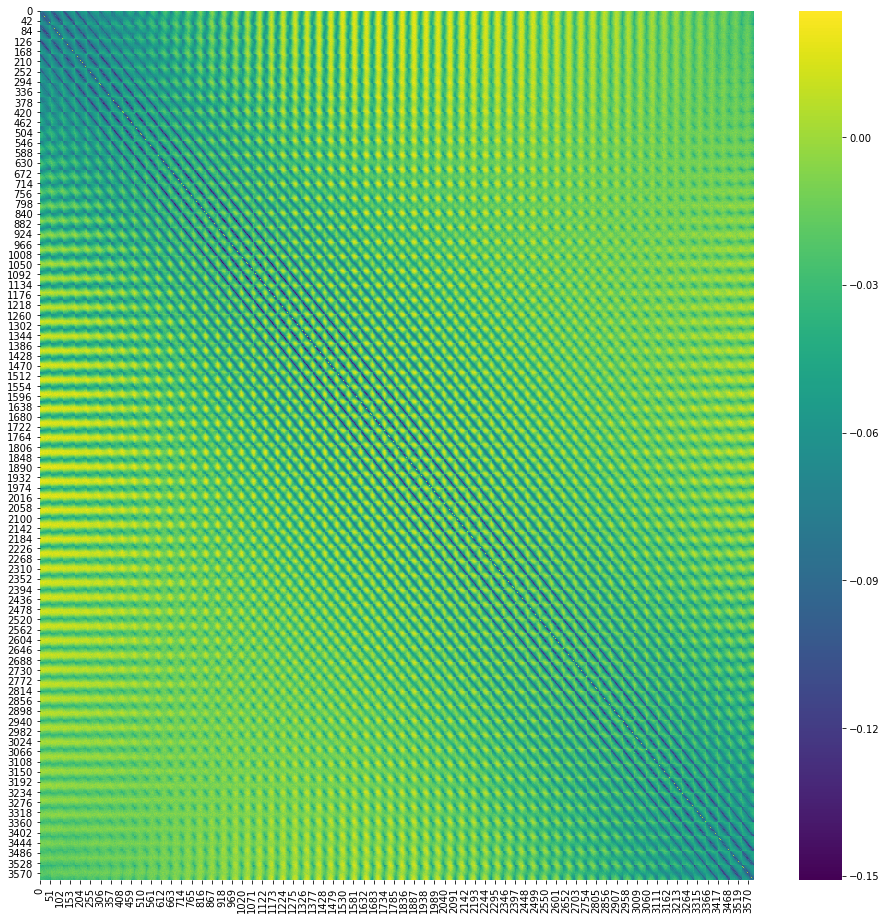

In [499]:
err_ = cor_m  - cor_m_new
plt.figure(figsize = (16,16))
sns.heatmap(err_, cmap='viridis')

In [500]:
X_train = df3.values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
pca = PCA(n_components=78)
X_tr = pca.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


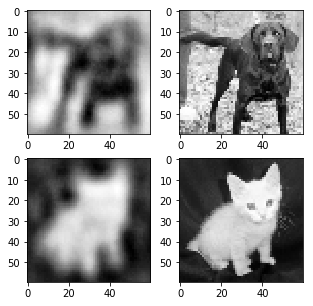

In [501]:
k = 1
b = 126
w = np.dot(X_tr,pca.components_) 
fig,ax=plt.subplots(2,2,figsize=(5,5))
temp = np.reshape(w[k], (60,60)) 
ax[0,0].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(X_train[k], (60,60))
ax[0,1].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(w[b], (60,60)) 
ax[1,0].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(X_train[b], (60,60))
ax[1,1].imshow(temp, cmap = 'Greys_r')

In [502]:
X_train = df3.values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
pca = PCA(n_components =3)
X_tr = pca.fit_transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


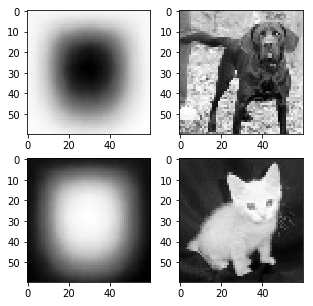

In [503]:
k = 1
b = 126
w = np.dot(X_tr,pca.components_) 
fig,ax=plt.subplots(2,2,figsize=(5,5))
temp = np.reshape(w[k], (60,60)) 
ax[0,0].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(X_train[k], (60,60))
ax[0,1].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(w[b], (60,60)) 
ax[1,0].imshow(temp, cmap = 'Greys_r')
temp = np.reshape(X_train[b], (60,60))
ax[1,1].imshow(temp, cmap = 'Greys_r')